In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features (important for NN training)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

def build_model(activation="relu", optimizer="adam"):
    model = keras.Sequential([
        layers.Dense(64, activation=activation, input_shape=[X_train.shape[1]]),
        layers.Dense(32, activation=activation),
        layers.Dense(1, activation="linear")  # Linear for regression
    ])
    
    model.compile(
        optimizer=optimizer,
        loss="mse",             # Mean Squared Error
        metrics=["mae", "mse"]  # Track Mean Absolute Error & MSE
    )
    return model


In [6]:
# Try relu + adam
model_relu = build_model(activation="relu", optimizer="adam")
history_relu = model_relu.fit(X_train, y_train, validation_split=0.1, epochs=20, batch_size=32, verbose=1)

# Try tanh + sgd
model_tanh = build_model(activation="tanh", optimizer="sgd")
history_tanh = model_tanh.fit(X_train, y_train, validation_split=0.1, epochs=20, batch_size=32, verbose=1)


Epoch 1/20
465/465 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.9683 - mae: 0.6624 - mse: 0.9683 - val_loss: 0.4861 - val_mae: 0.4994 - val_mse: 0.4861
Epoch 2/20
465/465 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.4255 - mae: 0.4669 - mse: 0.4255 - val_loss: 0.4398 - val_mae: 0.4646 - val_mse: 0.4398
Epoch 3/20
465/465 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.3875 - mae: 0.4428 - mse: 0.3875 - val_loss: 0.4090 - val_mae: 0.4557 - val_mse: 0.4090
Epoch 4/20
465/465 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.3608 - mae: 0.4284 - mse: 0.3608 - val_loss: 0.3857 - val_mae: 0.4350 - val_mse: 0.3857
Epoch 5/20
465/465 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.3486 - mae: 0.4159 - mse: 0.3486 - val_loss: 0.3800 - val_mae: 0.4318 - val_mse: 0.3800
Epoch 6/20
465/465 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.3406 - mae: 0.4098 - mse: 0.3406 - val_loss: 0.3645 - val_mae: 0.4270 - val_mse: 0.3645
Epoch 7/20
465/465 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.3691 - mae: 0.4056 - mse: 0.3691 - val

In [7]:
# Evaluate models
loss_relu, mae_relu, mse_relu = model_relu.evaluate(X_test, y_test, verbose=0)
loss_tanh, mae_tanh, mse_tanh = model_tanh.evaluate(X_test, y_test, verbose=0)

print(f"ReLU + Adam -> MAE: {mae_relu:.3f}, MSE: {mse_relu:.3f}, RMSE: {np.sqrt(mse_relu):.3f}")
print(f"Tanh + SGD  -> MAE: {mae_tanh:.3f}, MSE: {mse_tanh:.3f}, RMSE: {np.sqrt(mse_tanh):.3f}")


ReLU + Adam -> MAE: 0.374, MSE: 0.299, RMSE: 0.547
Tanh + SGD  -> MAE: 0.417, MSE: 0.368, RMSE: 0.607


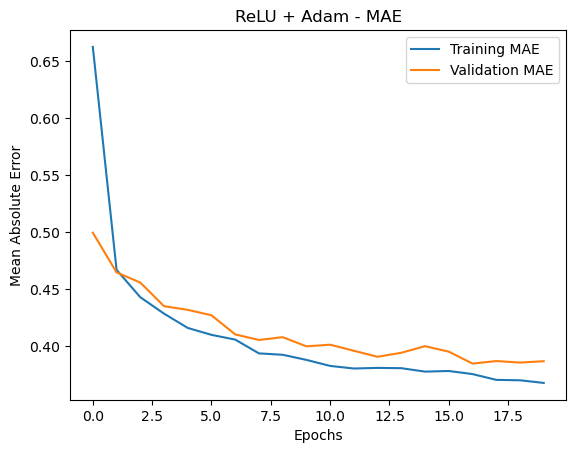

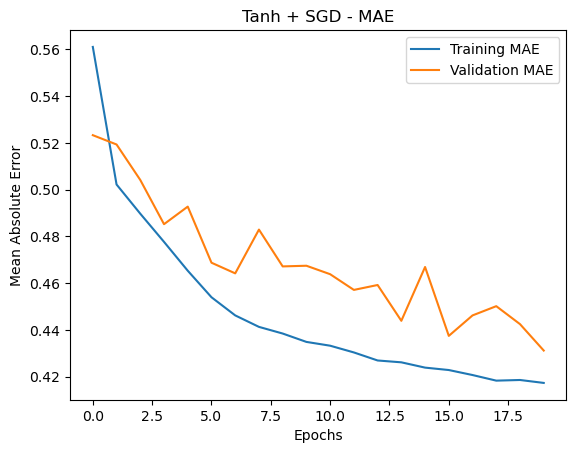

In [8]:
import matplotlib.pyplot as plt

def plot_mae(history, title="MAE over Epochs"):
    plt.plot(history.history['mae'], label="Training MAE")
    plt.plot(history.history['val_mae'], label="Validation MAE")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Mean Absolute Error")
    plt.legend()
    plt.show()

# Example usage:
plot_mae(history_relu, "ReLU + Adam - MAE")
plot_mae(history_tanh, "Tanh + SGD - MAE")


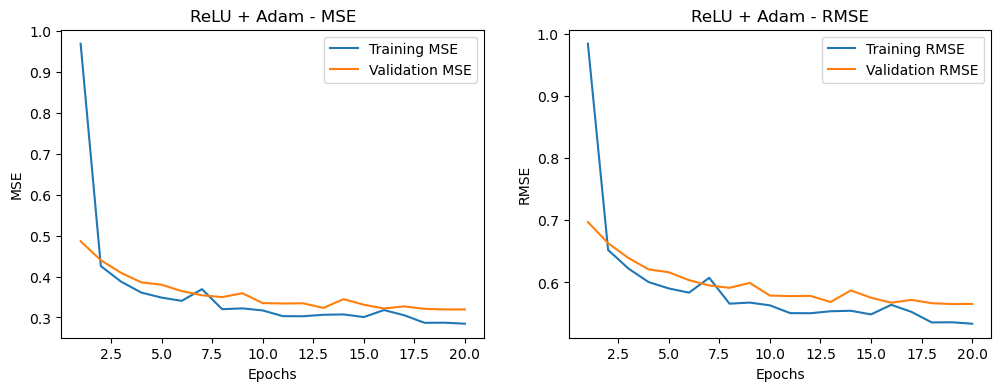

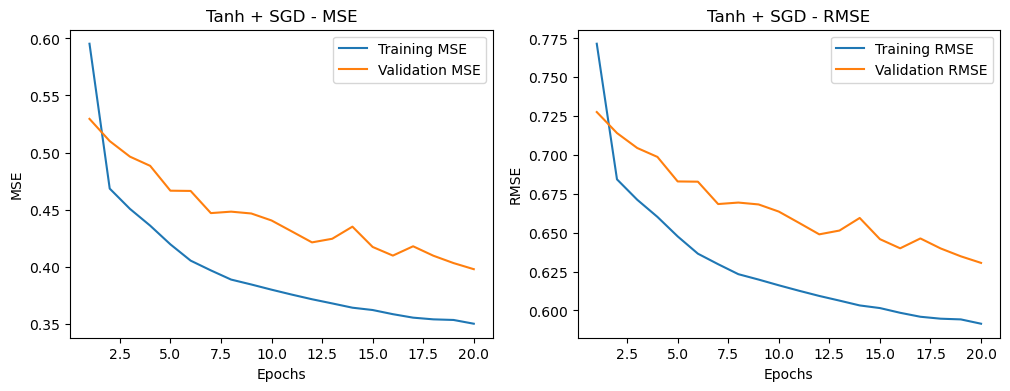

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def plot_metrics(history, title="Training Metrics"):
    epochs = range(1, len(history.history['loss']) + 1)

    # MSE
    plt.figure(figsize=(12,4))
    
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['mse'], label="Training MSE")
    plt.plot(epochs, history.history['val_mse'], label="Validation MSE")
    plt.xlabel("Epochs")
    plt.ylabel("MSE")
    plt.title(f"{title} - MSE")
    plt.legend()

    # RMSE (sqrt of MSE)
    rmse = np.sqrt(history.history['mse'])
    val_rmse = np.sqrt(history.history['val_mse'])

    plt.subplot(1, 2, 2)
    plt.plot(epochs, rmse, label="Training RMSE")
    plt.plot(epochs, val_rmse, label="Validation RMSE")
    plt.xlabel("Epochs")
    plt.ylabel("RMSE")
    plt.title(f"{title} - RMSE")
    plt.legend()

    plt.show()

# Example usage
plot_metrics(history_relu, "ReLU + Adam")
plot_metrics(history_tanh, "Tanh + SGD")
